# 1 problrm statement

In [21]:
# To predict the charges

# 2 data gathering

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm

In [23]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3 EDA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## check null / missing values

In [25]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## check ouliers

age            AxesSubplot(0.125,0.11;0.168478x0.77)
bmi         AxesSubplot(0.327174,0.11;0.168478x0.77)
children    AxesSubplot(0.529348,0.11;0.168478x0.77)
charges     AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

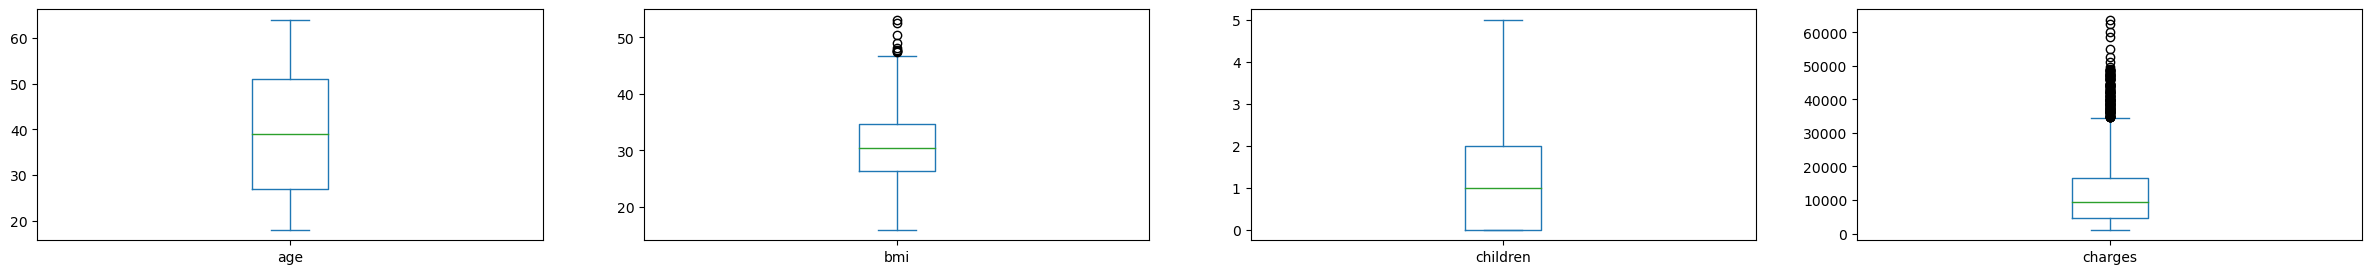

In [26]:
df.plot(kind = "box", subplots = True , figsize = (30,3))

# 4 feature engg

In [27]:
### lable encoding

In [28]:
df["sex"].value_counts().to_dict()

{'male': 676, 'female': 662}

In [29]:
df["sex"].replace({'male': 0, 'female': 1},inplace = True)

In [30]:
sex_value = {"female":0, "male":1}
sex_value

{'female': 0, 'male': 1}

In [31]:
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [32]:
df["smoker"].replace({'no': 0, 'yes': 1}, inplace = True)

In [33]:
smoker_value = {'no': 0, 'yes': 1}
smoker_value

{'no': 0, 'yes': 1}

In [34]:
df["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [35]:
# df["region"].replace({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}, inplace = True)

In [36]:
df = pd.get_dummies(df,columns=["region"])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [37]:
x = df.drop(["charges"],axis = 1)
y = df["charges"]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8 , random_state=0)

In [40]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [41]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)



Mean Sqaured Error : 37701533.128629126
Root Mean Sqaured Error : 6140.157418880165
Mean Absolute Error : 4234.5511433147
R Squared Value : 0.7370262574551634


In [42]:
# Model Evaluation for Testing Data
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)



Mean Sqaured Error : 31827950.229523845
Root Mean Sqaured Error : 5641.626558850191
Mean Absolute Error : 3933.272649405236
R Squared Value : 0.7999876970680433


### impute outliers

age                    AxesSubplot(0.125,0.11;0.065678x0.77)
sex                 AxesSubplot(0.203814,0.11;0.065678x0.77)
bmi                 AxesSubplot(0.282627,0.11;0.065678x0.77)
children            AxesSubplot(0.361441,0.11;0.065678x0.77)
smoker              AxesSubplot(0.440254,0.11;0.065678x0.77)
charges             AxesSubplot(0.519068,0.11;0.065678x0.77)
region_northeast    AxesSubplot(0.597881,0.11;0.065678x0.77)
region_northwest    AxesSubplot(0.676695,0.11;0.065678x0.77)
region_southeast    AxesSubplot(0.755508,0.11;0.065678x0.77)
region_southwest    AxesSubplot(0.834322,0.11;0.065678x0.77)
dtype: object

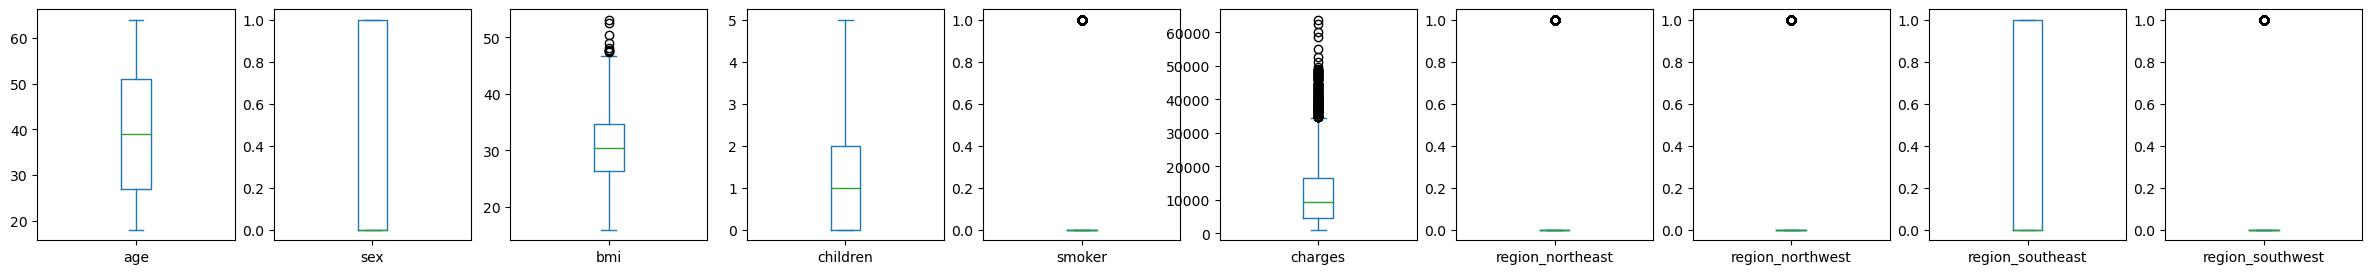

In [43]:
df.plot(kind = "box", subplots = True , figsize = (30,3))

<AxesSubplot:xlabel='bmi'>

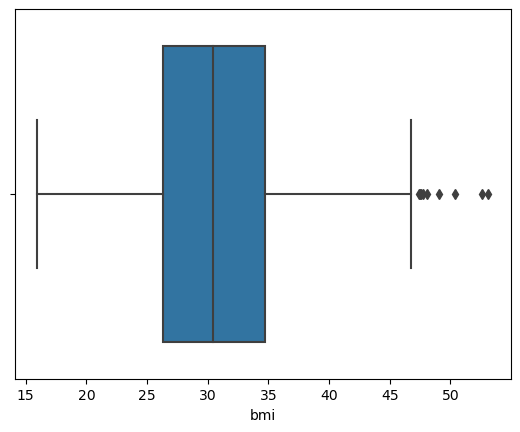

In [44]:
sns.boxplot(x = df["bmi"])

In [45]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

df["bmi"].loc[df["bmi"] > upper_tail] = upper_tail
df["bmi"].loc[df["bmi"] < lower_tail] = lower_tail

In [46]:
df["bmi"].loc[df["bmi"] > upper_tail]

Series([], Name: bmi, dtype: float64)

In [47]:
df["bmi"].loc[df["bmi"] < lower_tail] 

Series([], Name: bmi, dtype: float64)

age                    AxesSubplot(0.125,0.11;0.065678x0.77)
sex                 AxesSubplot(0.203814,0.11;0.065678x0.77)
bmi                 AxesSubplot(0.282627,0.11;0.065678x0.77)
children            AxesSubplot(0.361441,0.11;0.065678x0.77)
smoker              AxesSubplot(0.440254,0.11;0.065678x0.77)
charges             AxesSubplot(0.519068,0.11;0.065678x0.77)
region_northeast    AxesSubplot(0.597881,0.11;0.065678x0.77)
region_northwest    AxesSubplot(0.676695,0.11;0.065678x0.77)
region_southeast    AxesSubplot(0.755508,0.11;0.065678x0.77)
region_southwest    AxesSubplot(0.834322,0.11;0.065678x0.77)
dtype: object

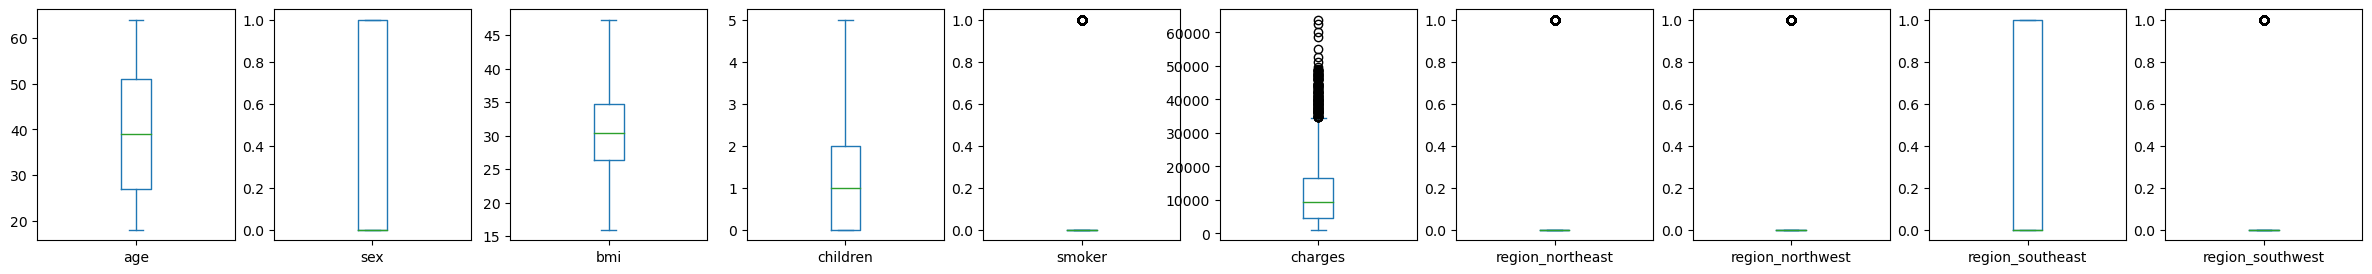

In [48]:
df.plot(kind = "box", subplots = True , figsize = (30,3))

In [49]:

df1 = df["charges"]
df = df.drop(["charges"],axis = 1)
df = pd.concat([df,df1],axis = 1)
df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,27.900,0,1,0,0,0,1,16884.92400
1,18,0,33.770,1,0,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,0,1,0,4449.46200
3,33,0,22.705,0,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,10600.54830
1334,18,1,31.920,0,0,1,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,0,1,0,1629.83350
1336,21,1,25.800,0,0,0,0,0,1,2007.94500


# asumptions 
# 1 linearity

<AxesSubplot:>

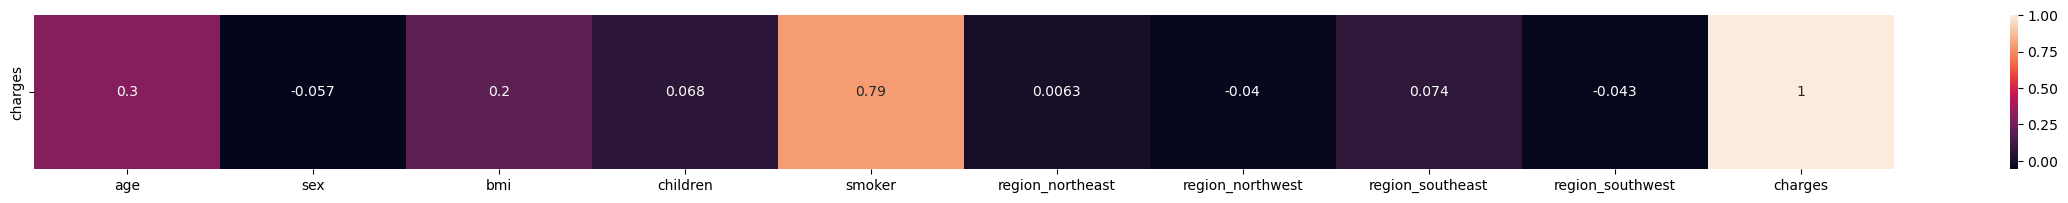

In [50]:
plt.figure(figsize=(30,2))
sns.heatmap(df.corr().tail(1),annot=True)

# 2 no multicolinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
x = df.drop(["charges"],axis = 1)
y = df["charges"]

In [53]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(), i)
    vif_list.append(vif)
    
s = pd.Series(vif_list, index= x.columns)    

<AxesSubplot:>

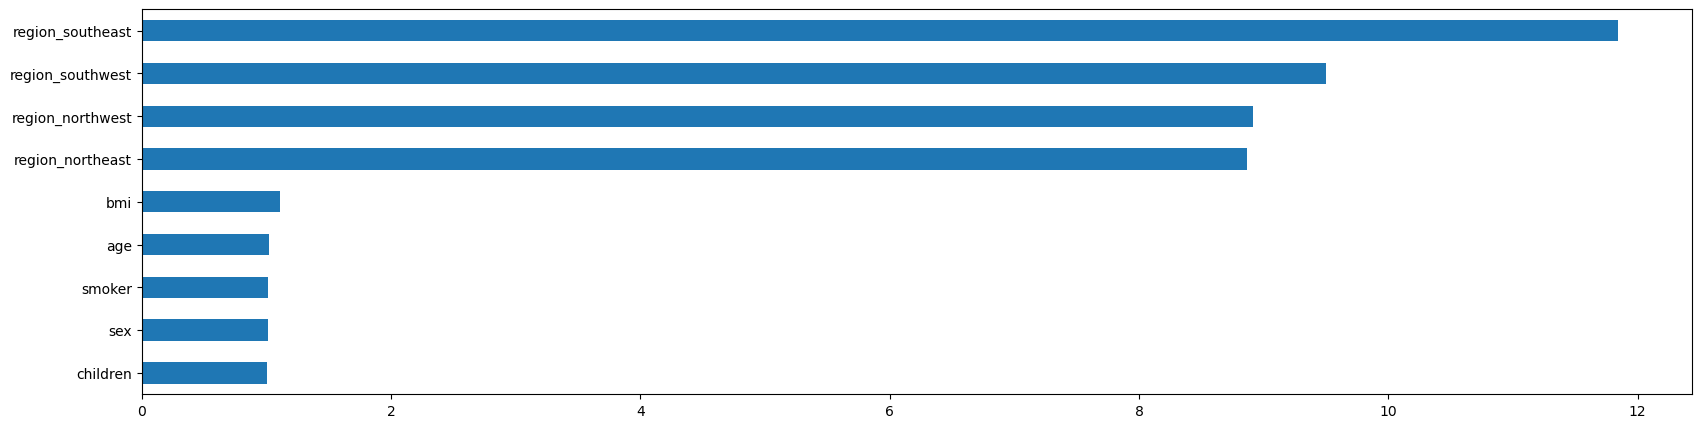

In [54]:
s.sort_values().plot(kind = "barh", figsize = (20,5))

# 6 model building

In [55]:
from sklearn.model_selection import train_test_split , GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

In [56]:
x_train , x_test , y_train , y_test = train_test_split(x,y, train_size=0.8, random_state=0)

In [57]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# 7 model evalution

In [58]:
# training data
y_pred = model.predict(x_train)
print(y_pred[:5])
y_train[:5]

[33606.42420103  3414.52079209 30837.99455794  8235.25256225
 14205.27908666]


621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

## 3 normality of residual

<AxesSubplot:xlabel='charges', ylabel='Density'>

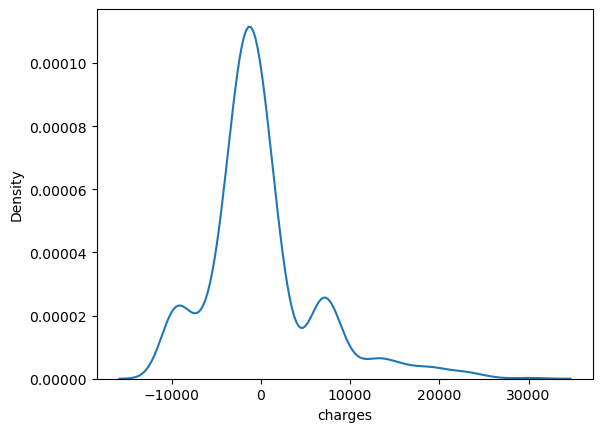

In [59]:
residual = y_train - y_pred
sns.kdeplot(residual)

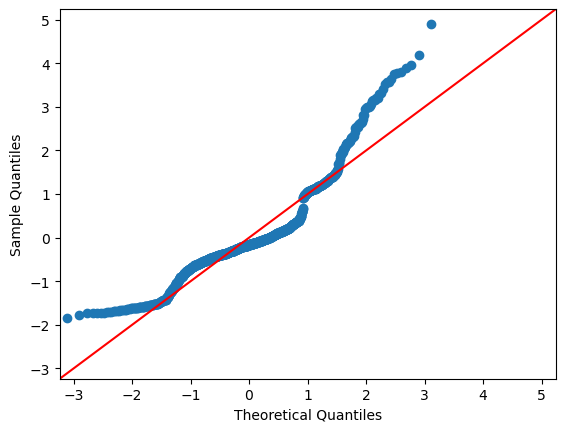

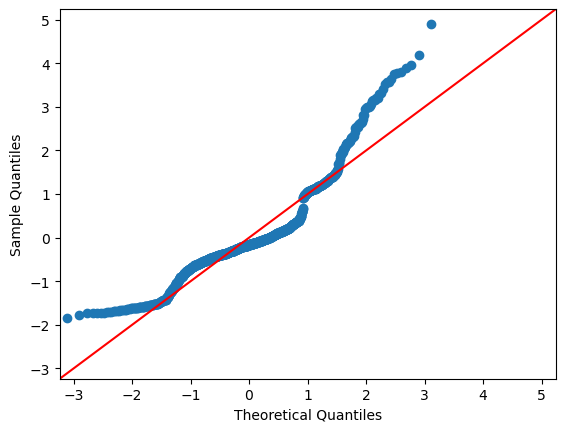

In [60]:
sm.qqplot(residual , fit = True ,line = "45")

In [61]:
residual.skew()

1.282727991493378

## 4 homoscedasticity

<AxesSubplot:xlabel='charges', ylabel='charges'>

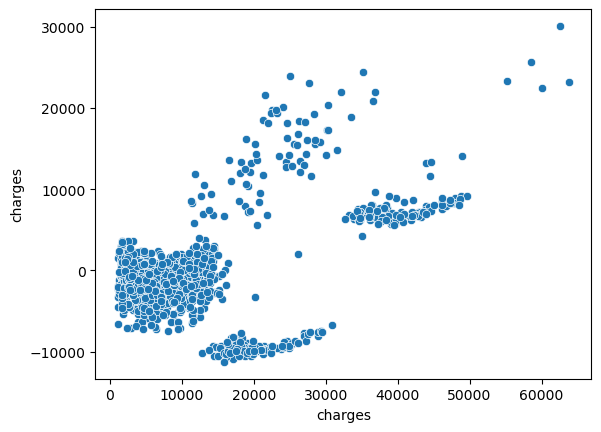

In [62]:
sns.scatterplot(x = y_train , y = residual)

In [63]:
r2 = r2_score( y_train , y_pred)
r2

0.7371466197776543

In [64]:
# testing data
y_pred = model.predict(x_test)
print(y_pred[:5])
y_train[:5]

[11166.7320211   9482.21138404 38222.11904203 16293.36855653
  6867.32989145]


621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

In [65]:
r2 = r2_score(y_test, y_pred)
r2

0.7999934616531856

# regularization
# 1 lasso 

In [66]:
L_model = Lasso()
L_model.fit(x_train, y_train)

Lasso()

In [67]:
y_pred = L_model.predict(x_train)
print(y_pred[:5])
print(y_train[:5])

[33604.1115818   3422.25489003 30823.98919419  8240.73942443
 14199.78410542]
621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64


## hyper parameter tunning
## gridsearch

In [68]:
pram_grid = ({"alpha":np.arange(0.01,3,0.01)})
grid = GridSearchCV(L_model , pram_grid , n_jobs=-1)
grid.fit(x_train,y_train)
grid.best_estimator_
L_model = grid.best_estimator_

In [69]:
# trainning data
r2 = r2_score(y_train,y_pred)
r2

0.7371464168105688

In [70]:
## testing data
y_pred = L_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.7998852707605322

# randomized

In [71]:
pram_grid = ({"alpha":np.arange(0.01,3,0.01)})
randomize = RandomizedSearchCV(L_model , pram_grid , n_jobs=-1)
randomize.fit(x_train,y_train)
randomize.best_estimator_
L_model = randomize.best_estimator_


In [72]:
y_pred = L_model.predict(x_train)
# trainning data
r2 = r2_score(y_train,y_pred)
print(r2)
print()
## testing data
y_pred = L_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.7371453208494289



0.7998965557059791

# 2 Ridge

In [73]:
R_model = Ridge()
R_model.fit(x_train,y_train)

Ridge()

In [74]:
y_pred = R_model.predict(x_train)
print(y_pred[:5])
print(y_train[:5])

[33497.68271873  3455.12590756 30727.07844817  8261.35052217
 14225.25191728]
621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64


## hyper parameter tunning

## 1 grid search

In [75]:
pram_grid = ({"alpha":np.arange(0.01,3,0.01)})
grid = GridSearchCV(R_model , pram_grid , n_jobs=-1)
grid.fit(x_train,y_train)
grid.best_estimator_
R_model = grid.best_estimator_

In [76]:
# trainning data
r2 = r2_score(y_train,y_pred)
r2

0.7371256725064401

In [77]:
## testing data
y_pred = L_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.7998965557059791

## 2 randomize

In [78]:
pram_grid = ({"alpha":np.arange(0.01,3,0.01)})
randomize = RandomizedSearchCV(L_model , pram_grid , n_jobs=-1)
randomize.fit(x_train,y_train)
randomize.best_estimator_
L_model = randomize.best_estimator_


In [79]:
y_pred = L_model.predict(x_train)
# trainning data
r2 = r2_score(y_train,y_pred)
print(r2)
print()
## testing data
y_pred = L_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.7371449917457811



0.7998855937139165

In [80]:
x.head(1).T

,0
age,19.0
sex,1.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [81]:
column_names = x.columns
len(column_names)

9

In [83]:
import pickle
import json

In [84]:
with open("Linear model.pkl", "wb") as f:
    pickle.dump(model, f)

In [85]:
json_data = {"sex":sex_value, 
            "smoker":smoker_value,
            "columns":list(column_names)}
json_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

# user input testing

In [86]:
age = 19.0
sex = "female"
bmi = 27.9
children = 0.0
smoker = "no"
region = "northwest"

region = "region_" + region
region

region_index = np.where(column_names == region)[0][0]
region_index

6

In [87]:
region_index = region_index = list(column_names).index(region)
region_index

6

In [88]:
json_data['columns']

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [89]:
test_array = np.zeros(len(column_names))

test_array[0] = age
test_array[1] = json_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = json_data['smoker'][smoker]
test_array[region_index] = 1

test_array

array([19. ,  0. , 27.9,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ])

In [91]:
charges = round(model.predict([test_array])[0],2)
print("Predicted Medical Insurance Charges is :", charges, "/- Rs. Only")

Predicted Medical Insurance Charges is : 2101.27 /- Rs. Only


In [92]:
data = dict([('age', '84'), ('sex', 'male'), ('bmi', '24'), ('children', '2'), ('smoker', 'no'), ('region', 'northeast')])
data

{'age': '84',
 'sex': 'male',
 'bmi': '24',
 'children': '2',
 'smoker': 'no',
 'region': 'northeast'}